In [1]:
# here's a file that has no bottom row on the first page
import pdfplumber
path = "../srcpdfs/UFOReports2006WholeoftheUK.pdf"
pdf = pdfplumber.open(path)

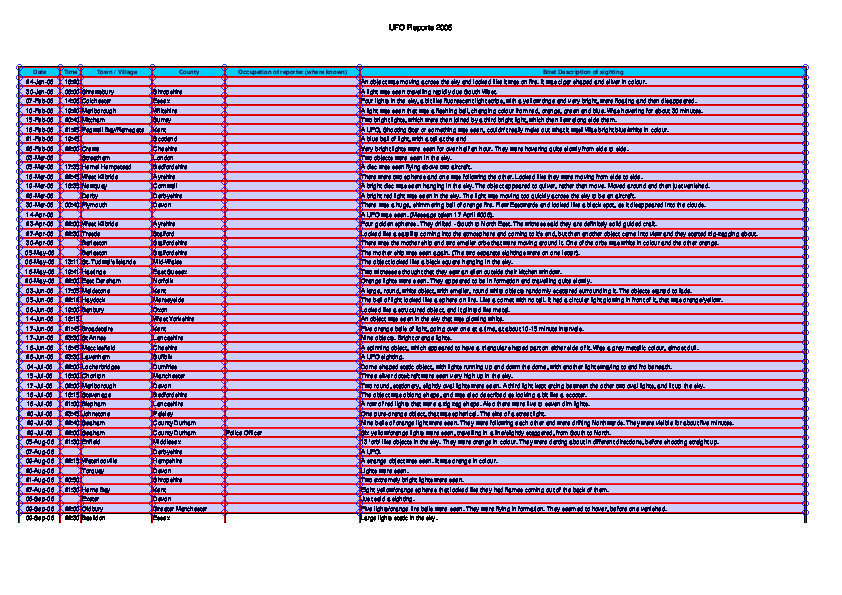

In [2]:
# on the first page the bottom row of the table isn't identified by default settings of tablefinder
p0 = pdf.pages[0]
im = p0.to_image()
im.reset().debug_tablefinder()

In [3]:
# the last row returned by the tablefinder is not Basildon by Oldbury
p0.extract_table()[-1]

['09-Sep-06',
 '22:00',
 'Oldbury',
 'Greater Manchester',
 '',
 'Five lights/orange fire balls were seen. They were flying in formation. They seemed to hover, before one vanished.']

In [4]:
# we can get the debug information of the tablefinder() and use the last set of decimal values
# to determine where the bottom row should be
db = p0.debug_tablefinder()
starts_at =db.cells[-1][1] # the position the border top
ends_at =db.cells[-1][3] # the position of border bottom
diff = ends_at - starts_at # the row height
new_ends_at = ends_at + diff # border bottom plus row height
print(new_ends_at)

522.400


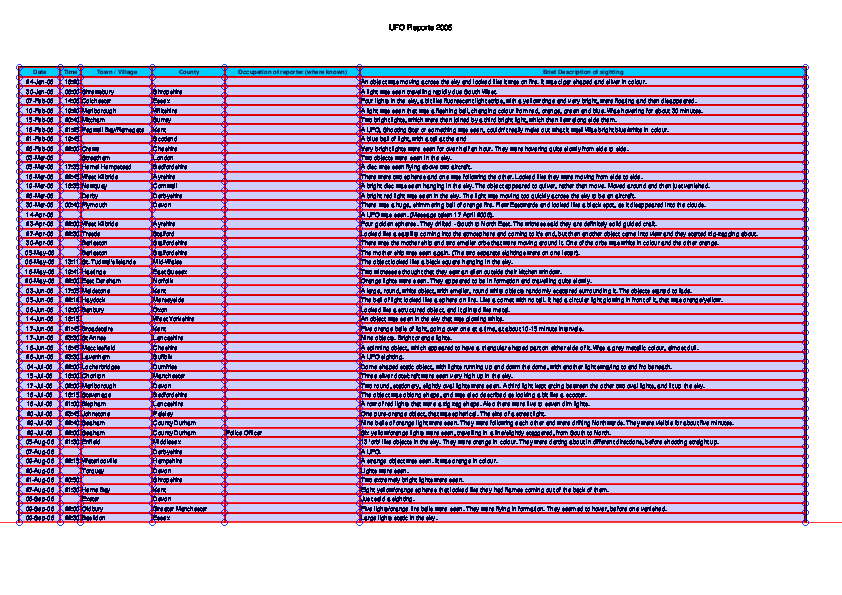

In [5]:
# we can pass a setting to the table finder to add a horizontal line to close off the table
settings={
            "explicit_horizontal_lines":[
                new_ends_at
            ],
}
# and then we can re-try the tablefinder
im.reset().debug_tablefinder(settings)

In [6]:
# now we should get Basildon as our last row of data
p0.extract_table(settings)[-1]

['09-Sep-06',
 '22:30',
 'Basildon',
 'Essex',
 '',
 'Large lights static in the sky.']